# Hierarchical Clustering

<br> 

Throughout this notebook, the Agglomerative Clustering model will be implemented on both the Zero and Nonzero Datasets.

## <u> Table of Contents </u>
* [Import the DataSet](#1)
* [Modelling Zero Data](#MMM)
    * [Elbow & Silhoutte: Zero](#23)
        * [Zero: Hierarchical Clustering](#M2)
        * [Zero Visualisation](#N0)
* [Modelling Nonzero Data](#MMMM)
    * [Elbow & Silhoutte: Nonzero](#MU) 
        * [Nonzero: Hierarchical Clustering](#M7)
        * [Nonzero Visualisation](#N00)
<br>

## Import the DataSet  <a class="anchor" id="1"></a>

In [1]:
#!pip install plotly
#!pip install joypy
#!pip install pyvis
#!pip install prince
#!pip install pyclustering
#!pip install clusteval
#!pip install kmodes
#!pip install gower
#!pip install scikit-learn-extra
#!pip install minisom
#!pip install fuzzy-c-means

In [2]:
# Remove the warnings

import warnings; warnings.simplefilter('ignore')

# Basic Packages

import pandas as pd
import numpy as np
from numpy import asarray
from numpy import save

# Set a random state 

np.random.seed(9)

# Notebook Setup

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"
pd.set_option('display.max_columns', None)

# Plotting Packages

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from matplotlib.widgets import SpanSelector
from bokeh.models import Div, RangeSlider, Spinner
from bokeh.plotting import figure, show
import plotly.express as px
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from joypy import joyplot
from pyvis.network import Network
from IPython.display import Image
import plotly.offline as pyo

# Set notebook mode to work in offline

pyo.init_notebook_mode()

# Packages for Transformations

import scipy.special
import prince
from sklearn.preprocessing import PowerTransformer
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# Packages for Clustering

from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans
from clusteval import clusteval
from kmodes.kmodes import KModes
from sklearn.cluster import AgglomerativeClustering 
import gower
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import DBSCAN
from minisom import MiniSom
from sklearn.cluster import Birch
import scipy.cluster.hierarchy as shc
from fcmeans import FCM

# Packages to measure performance

from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from scipy.spatial import distance as ssd
from pyclustering.cluster.kmedoids import kmedoids

In [3]:
# Import the zero dataset 

final_zero = pd.read_csv('/Users/cirillogirardi/Desktop/Dissertation/Original/final_zero.csv')
tra_zero = pd.read_csv('/Users/cirillogirardi/Desktop/Dissertation/Original/tra_zero.csv')
zero_df = pd.read_csv('/Users/cirillogirardi/Desktop/Dissertation/Original/zero_df.csv')

# Import the nonzero dataset 

final_nonzero = pd.read_csv('/Users/cirillogirardi/Desktop/Dissertation/Original/final_nonzero.csv')
tra_nonzero = pd.read_csv('/Users/cirillogirardi/Desktop/Dissertation/Original/tra_nonzero.csv')
nonzero_df = pd.read_csv('/Users/cirillogirardi/Desktop/Dissertation/Original/nonzero_df.csv')

## Model Definition

In [1077]:
# We define the models we are interested in set the parameters to evaluate the GOF

ce_hierarchical = clusteval(cluster='agglomerative', evaluate='derivative')

<br>

## Modelling Zero Data <a class="anchor" id="MMM"></a>

<br>

## Elbow & Silhoutte: Zero  <a class="anchor" id="23"></a>

For the visualisations we use a package called clusteval which easily computes and depicts the measurements of goodness of fit (GOF) for the models.
<br>

**Zero Data-Set**

In [1078]:
# we create an array based on the dataset

numpy_arr_1 = final_zero.to_numpy()


[clusteval] >Fit using kmeans with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|███████████████████████████████████████████| 23/23 [00:16<00:00,  1.36it/s]


[clusteval] >Optimal number clusters detected: [2].
[clusteval] >Fin.


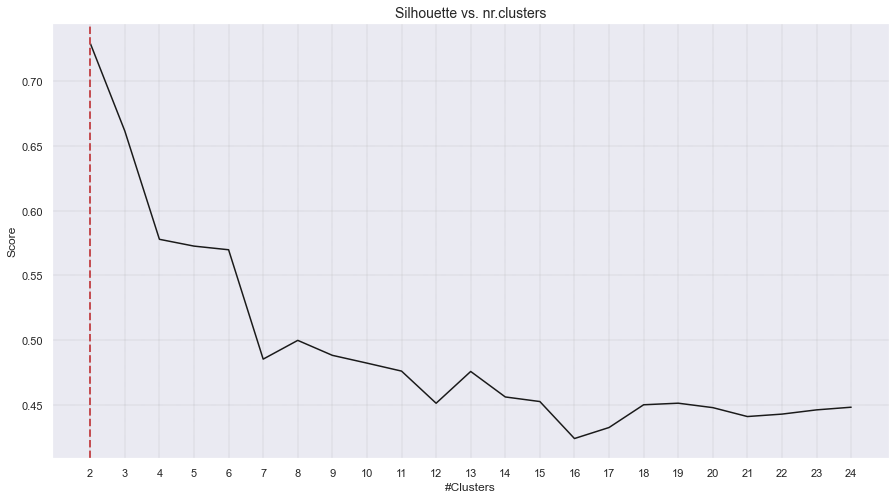


[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using derivatives.
[clusteval] >Determining optimal clustering by derivatives..
[clusteval] >Clusters: 7
[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [7].
[clusteval] >Fin.


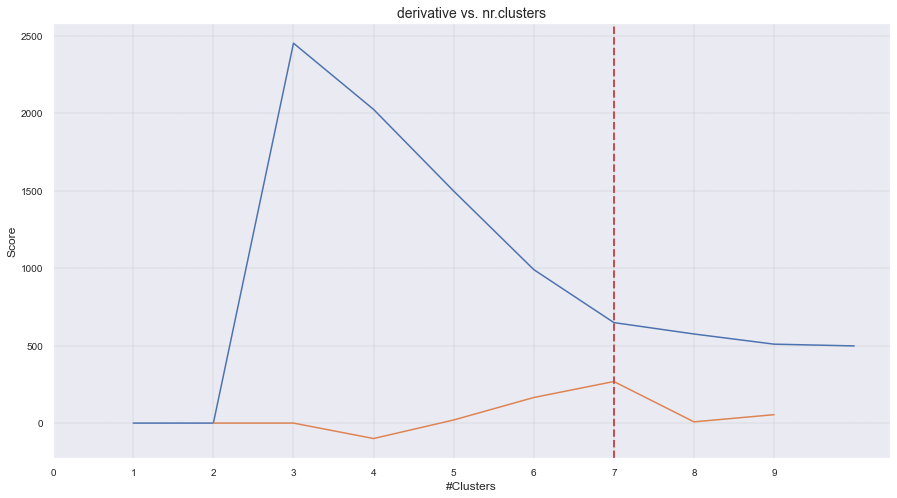

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'derivative vs. nr.clusters'}, xlabel='#Clusters', ylabel='Score'>)

In [1079]:
# Fit the array to find optimal number of clusters

ce_hierarchical.fit(numpy_arr_1)

# Make plot of the silhouette

ce_hierarchical.plot()

###  Zero

In [1086]:
#PCA with one principal component
pca_1d = PCA(n_components=1)

#PCA with two principal components
pca_2d = PCA(n_components=2)

#PCA with three principal components
pca_3d = PCA(n_components=3)

#### Hierarchical Clustering <a class="anchor" id="M2"></a>

In [1296]:
# we set the function for hierarchical clustering using euclidean distances

hc_zero = AgglomerativeClustering(n_clusters= 7, affinity = 'euclidean', linkage ='centroid')

# Fit the function to the original zero dataset

hc_zero.fit(final_zero)

# Assign the labels to the respective rows and further view the cluster segmentation 

final_zero['Cluster_h'] = hc_zero.labels_
tra_zero['Cluster_h']= hc_zero.labels_

zero_df['Cluster_h'] = hc_zero.labels_
zero_df['Cluster_h'].value_counts()

ValueError: Unknown linkage type centroid. Valid options are dict_keys(['ward', 'complete', 'average', 'single'])

In [1295]:
print(silhouette_score(final_zero, final_zero["Cluster_h"]))
print(calinski_harabasz_score(final_zero, final_zero["Cluster_h"]))
print(davies_bouldin_score(final_zero, final_zero["Cluster_h"]))

print(silhouette_score(zero_df, zero_df['Cluster_h']))
print(calinski_harabasz_score(zero_df, zero_df['Cluster_h']))
print(davies_bouldin_score(zero_df, zero_df['Cluster_h']))

0.4872783212450006
23708.23063310838
0.6937572975405761
-0.4823094053633393
11.482154285947946
11.441174558373689


### Zero Visualisation <a class="anchor" id="N0"></a>

In [1094]:
tt = tra_zero.drop(columns=['Cluster_k', 'Cluster_h'])

PCs_1d = pd.DataFrame(pca_1d.fit_transform(tt))

PCs_2d = pd.DataFrame(pca_2d.fit_transform(tt))

PCs_3d = pd.DataFrame(pca_3d.fit_transform(tt))


#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'

PCs_1d.columns = ["PC1_1d"]

PCs_2d.columns = ["PC1_2d", "PC2_2d"]

PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]


tra_zero1=tra_zero.copy()

tra_zero1 = pd.concat([tra_zero1,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')


cluster0_h = tra_zero1[tra_zero1["Cluster_h"] == 0]
cluster1_h = tra_zero1[tra_zero1["Cluster_h"] == 1]
cluster2_h = tra_zero1[tra_zero1["Cluster_h"] == 2]
cluster3_h = tra_zero1[tra_zero1["Cluster_h"] == 3]
cluster4_h = tra_zero1[tra_zero1["Cluster_h"] == 4]
cluster5_h = tra_zero1[tra_zero1["Cluster_h"] == 5]
cluster6_h = tra_zero1[tra_zero1["Cluster_h"] == 6]

In [1095]:
#Instructions for building the 2-D plot

#For 'Cluster 0'
trace0 = go.Scatter(
                    x = cluster0_h["PC1_2d"],
                    y = cluster0_h["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#For 'Cluster 1'
trace1 = go.Scatter(
                    x = cluster1_h["PC1_2d"],
                    y = cluster1_h["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#For 'Cluster 2'
trace2 = go.Scatter(
                    x = cluster2_h["PC1_2d"],
                    y = cluster2_h["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

#For 'Cluster 3'
trace3 = go.Scatter(
                    x = cluster3_h["PC1_2d"],
                    y = cluster3_h["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'grey'),
                    text = None)

#For 'Cluster 4'
trace4 = go.Scatter(
                    x = cluster4_h["PC1_2d"],
                    y = cluster4_h["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'black'),
                    text = None)

#For 'Cluster 5'
trace5 = go.Scatter(
                    x = cluster5_h["PC1_2d"],
                    y = cluster5_h["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 5",
                    marker = dict(color = 'blue'),
                    text = None)

#For 'Cluster 6'
trace6 = go.Scatter(
                    x = cluster6_h["PC1_2d"],
                    y = cluster6_h["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 6",
                    marker = dict(color = 'red'),
                    text = None)

data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

pyo.iplot(fig)

In [1096]:
#Instructions for building the 2-D plot

#For 'Cluster 0'
trace0 = go.Scatter3d(
                    x = cluster0_h["PC1_3d"],
                    y = cluster0_h["PC2_3d"],
                    z = cluster0_h["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#For 'Cluster 1'
trace1 = go.Scatter3d(
                    x = cluster1_h["PC1_3d"],
                    y = cluster1_h["PC2_3d"],
                    z = cluster1_h["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#For 'Cluster 2'
trace2 = go.Scatter3d(
                    x = cluster2_h["PC1_3d"],
                    y = cluster2_h["PC2_3d"],
                    z = cluster2_h["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

#For 'Cluster 3'
trace3 = go.Scatter3d(
                    x = cluster3_h["PC1_3d"],
                    y = cluster3_h["PC2_3d"],
                    z = cluster3_h["PC3_3d"],                
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'grey'),
                    text = None)

#For 'Cluster 4'
trace4 = go.Scatter3d(
                    x = cluster4_h["PC1_3d"],
                    y = cluster4_h["PC2_3d"],
                    z = cluster4_h["PC3_3d"],                
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'black'),
                    text = None)

#For 'Cluster 5'
trace5 = go.Scatter3d(
                    x = cluster5_h["PC1_3d"],
                    y = cluster5_h["PC2_3d"],
                    z = cluster5_h["PC3_3d"],                
                    mode = "markers",
                    name = "Cluster 5",
                    marker = dict(color = 'blue'),
                    text = None)

#For 'Cluster 6'
trace6 = go.Scatter3d(
                    x = cluster6_h["PC1_3d"],
                    y = cluster6_h["PC2_3d"],
                    z = cluster6_h["PC3_3d"],                
                    mode = "markers",
                    name = "Cluster 6",
                    marker = dict(color = 'red'),
                    text = None)

data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

pyo.iplot(fig)

<br>

## Modelling Nonzero Data <a class="anchor" id="MMMM"></a>

<br>

## Elbow & Silhoutte: Nonzero  <a class="anchor" id="MU"></a>

**Non-Zero DataSet**

In [1082]:
# we create an array based on the dataset

numpy_arr_2 = final_nonzero.to_numpy()


[clusteval] >Fit using kmeans with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|███████████████████████████████████████████| 23/23 [01:06<00:00,  2.91s/it]


[clusteval] >Optimal number clusters detected: [2].
[clusteval] >Fin.


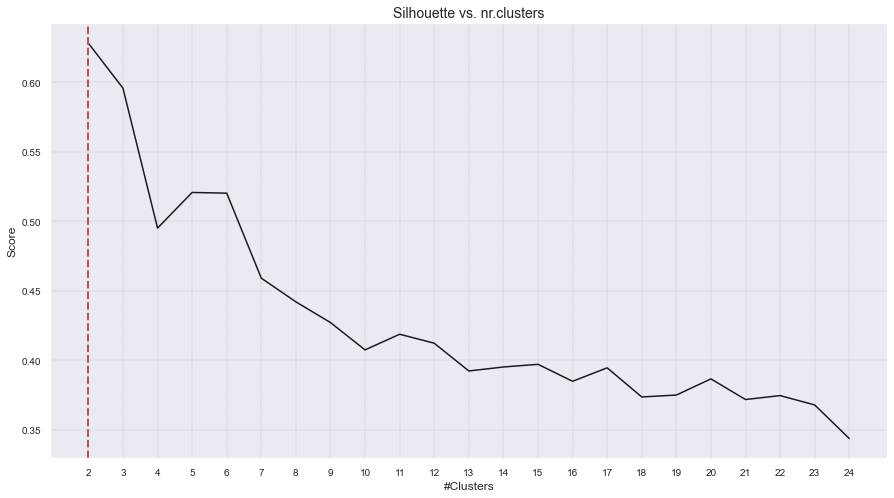


[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using derivatives.
[clusteval] >Determining optimal clustering by derivatives..
[clusteval] >Clusters: 6
[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [6].
[clusteval] >Fin.


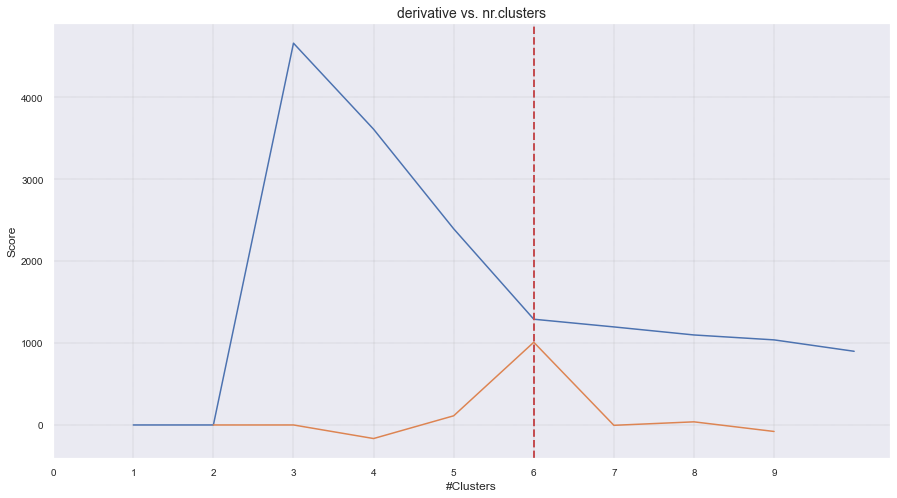

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'derivative vs. nr.clusters'}, xlabel='#Clusters', ylabel='Score'>)

In [1083]:
# Fit the array to find optimal number of clusters

ce_hierarchical.fit(numpy_arr_2)

# Make plot of the silhouette

ce_hierarchical.plot()

###  Non-Zero <a class="anchor" id="NN"></a>

#### Hierarchical Clustering  <a class="anchor" id="M7"></a>

In [1111]:
# we set the function for Hierarchical Clustering with euclidean distance

hc_nonzero = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='ward')

# Fit the function to the original nonzero dataset

hc_nonzero.fit(final_nonzero)

# Assign the labels to the respective rows and further view the cluster segmentation 

final_nonzero['Cluster_h'] = hc_nonzero.labels_
tra_nonzero['Cluster_h'] = hc_nonzero.labels_

nonzero_df["Cluster_h"] = hc_nonzero.labels_
nonzero_df['Cluster_h'].value_counts()

0    5224
1    2935
3    2080
4    1552
2    1276
5     740
Name: Cluster_h, dtype: int64

In [1112]:
print(silhouette_score(final_nonzero, final_nonzero["Cluster_h"]))
print(calinski_harabasz_score(final_nonzero, final_nonzero["Cluster_h"]))
print(davies_bouldin_score(final_nonzero, final_nonzero["Cluster_h"]))

print(silhouette_score(nonzero_df, nonzero_df['Cluster_h']))
print(calinski_harabasz_score(nonzero_df, nonzero_df['Cluster_h']))
print(davies_bouldin_score(nonzero_df, nonzero_df['Cluster_h']))

0.4870051288659874
55024.6056347944
0.630916009615603
-0.4254991726351177
103.89343382359316
9.642532883927858


### Nonzero Visualisation <a class="anchor" id="N00"></a>

In [1113]:
nn = tra_nonzero.drop(columns=['Cluster_k', 'Cluster_h'])

PCs_1d_n = pd.DataFrame(pca_1d.fit_transform(nn))

PCs_2d_n = pd.DataFrame(pca_2d.fit_transform(nn))

PCs_3d_n = pd.DataFrame(pca_3d.fit_transform(nn))


#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'

PCs_1d_n.columns = ["PC1_1d"]

PCs_2d_n.columns = ["PC1_2d", "PC2_2d"]

PCs_3d_n.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]


tra_nonzero1=tra_nonzero.copy()

tra_nonzero1 = pd.concat([tra_nonzero1,PCs_1d_n,PCs_2d_n,PCs_3d_n], axis=1, join='inner')


cluster0_nh = tra_nonzero1[tra_nonzero1["Cluster_h"] == 0]
cluster1_nh = tra_nonzero1[tra_nonzero1["Cluster_h"] == 1]
cluster2_nh = tra_nonzero1[tra_nonzero1["Cluster_h"] == 2]
cluster3_nh = tra_nonzero1[tra_nonzero1["Cluster_h"] == 3]
cluster4_nh = tra_nonzero1[tra_nonzero1["Cluster_h"] == 4]
cluster5_nh = tra_nonzero1[tra_nonzero1["Cluster_h"] == 5]

In [1114]:
#Instructions for building the 2-D plot

#For 'Cluster 0'
trace0 = go.Scatter(
                    x = cluster0_nh["PC1_2d"],
                    y = cluster0_nh["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#For 'Cluster 1'
trace1 = go.Scatter(
                    x = cluster1_nh["PC1_2d"],
                    y = cluster1_nh["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#For 'Cluster 2'
trace2 = go.Scatter(
                    x = cluster2_nh["PC1_2d"],
                    y = cluster2_nh["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

#For 'Cluster 3'
trace3 = go.Scatter(
                    x = cluster3_nh["PC1_2d"],
                    y = cluster3_nh["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'grey'),
                    text = None)

#For 'Cluster 4'
trace4 = go.Scatter(
                    x = cluster4_nh["PC1_2d"],
                    y = cluster4_nh["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'black'),
                    text = None)

#For 'Cluster 5'
trace5 = go.Scatter(
                    x = cluster5_nh["PC1_2d"],
                    y = cluster5_nh["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 5",
                    marker = dict(color = 'blue'),
                    text = None)


data = [trace0, trace1, trace2, trace3, trace4, trace5]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

pyo.iplot(fig)

In [1115]:
#Instructions for building the 2-D plot

#For 'Cluster 0'
trace0 = go.Scatter3d(
                    x = cluster0_nh["PC1_3d"],
                    y = cluster0_nh["PC2_3d"],
                    z = cluster0_nh["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#For 'Cluster 1'
trace1 = go.Scatter3d(
                    x = cluster1_nh["PC1_3d"],
                    y = cluster1_nh["PC2_3d"],
                    z = cluster1_nh["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#For 'Cluster 2'
trace2 = go.Scatter3d(
                    x = cluster2_nh["PC1_3d"],
                    y = cluster2_nh["PC2_3d"],
                    z = cluster2_nh["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

#For 'Cluster 3'
trace3 = go.Scatter3d(
                    x = cluster3_nh["PC1_3d"],
                    y = cluster3_nh["PC2_3d"],
                    z = cluster3_nh["PC3_3d"],                
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'grey'),
                    text = None)

#For 'Cluster 4'
trace4 = go.Scatter3d(
                    x = cluster4_nh["PC1_3d"],
                    y = cluster4_nh["PC2_3d"],
                    z = cluster4_nh["PC3_3d"],                
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'black'),
                    text = None)

#For 'Cluster 5'
trace5 = go.Scatter3d(
                    x = cluster5_nh["PC1_3d"],
                    y = cluster5_nh["PC2_3d"],
                    z = cluster5_nh["PC3_3d"],                
                    mode = "markers",
                    name = "Cluster 5",
                    marker = dict(color = 'blue'),
                    text = None)


data = [trace0, trace1, trace2, trace3, trace4, trace5]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

pyo.iplot(fig)